In [107]:
from sklearn import datasets
digits = datasets.load_digits()

In [108]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [109]:
import matplotlib.pyplot as plt

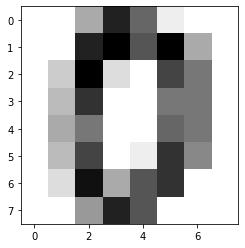

In [110]:
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

In [111]:
import numpy as np

In [112]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [113]:
v = np.matrix.flatten(digits.images[0]) / 15

In [114]:
result = random_classifier(v)

In [115]:
result

array([0.27062728, 0.20491579, 0.89421269, 0.18847756, 0.86656528,
       0.74006837, 0.32643351, 0.59112882, 0.25484429, 0.3401938 ])

In [116]:
def test_digit_classify(classifier,start_index=0,test_count=1000):
    correct = 0
    last_index = start_index + test_count
    for img, target in zip(digits.images[start_index:last_index],digits.target[start_index:last_index]):
        v = np.matrix.flatten(img) / 15
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return (correct/test_count)

In [117]:
test_digit_classify(random_classifier)

0.103

In [118]:
from math import exp
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [119]:
class MLP():
    def __init__(self,layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m)
            for m,n in zip(layer_sizes[:-1], layer_sizes[1:])
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]]
    def feedforward(self,v):
        activations = []
        a = v
        activations.append(a)
        for w,b in zip(self.weights, self.biases):
            z = w @ a + b
            a = [sigmoid(x) for x in z]
            activations.append(a)
        return activations
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])

In [120]:
nn = MLP([2,3])

In [121]:
nn.weights

[array([[0.72653388, 0.8158055 ],
        [0.11500172, 0.26835221],
        [0.61602012, 0.68373953]])]

In [122]:
nn.biases

[array([0.86726493, 0.33558316, 0.07488285])]

In [123]:
nn = MLP([64,16,10])

In [124]:
v = np.matrix.flatten(digits.images[0]) / 15

In [125]:
nn.evaluate(v)

array([0.99914818, 0.99966858, 0.9978517 , 0.99985852, 0.99997858,
       0.99951475, 0.99826297, 0.99899311, 0.99973331, 0.99737081])

In [126]:
x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]]) / 15.0
y = digits.target[:1000]

In [127]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,),
                    activation='logistic',
                    max_iter=100,
                    verbose=10,
                    random_state=1,
                    learning_rate_init=.1)

In [128]:
mlp.fit(x,y)

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(16,),
              learning_rate_init=0.1, max_iter=100, random_state=1, verbose=10)

In [129]:
mlp.predict_proba(x)[0]

array([9.99809644e-01, 4.98753964e-11, 2.92965424e-06, 1.13759373e-07,
       1.65244724e-06, 2.78040785e-05, 5.37796139e-06, 9.19004720e-05,
       8.28762196e-08, 6.04946691e-05])

In [130]:
def sklearn_trained_classify(v):
    return mlp.predict_proba([v])[0]

In [131]:
test_digit_classify(sklearn_trained_classify)

1.0

In [132]:
test_digit_classify(sklearn_trained_classify,start_index=1000,test_count=500)

0.962

In [133]:
nn = MLP([64,16,10])

In [134]:
nn.weights = [w.T for w in mlp.coefs_]

In [135]:
nn.biases = mlp.intercepts_

In [136]:
test_digit_classify(nn.evaluate,start_index=1000,test_count=500)

0.962